In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data for Training for "ForTraining_0001.csv".

### Data has two input columns/features/independent variables as numbers called A and B
### 9 mathematical operations have been performed to generate 9 dependent numerical columns
#### They are as below

* Addition = A + B
* Subtraction = A - B
* Multiplication = A * B
* Division = A / B
* Sin(Addition) = sin (A + B)
* Cos(Addition) = cos (A + B)
* sqrt(Addition) = SQRT( A + B) if (A + B) >= 0 or -1.00 if (A +B ) < 0
* 2 ^ Addition = 2 ^ (A +B)
* Log(Addition) = log(A + B)

### Additionally there is a dependent column present for classification training.
* ODD_OR_EVEN(CEIL(A+B)) = If MODULUS of CEIL(A + B) = 0 then "EVEN" else "ODD" [To be used for *classification training *]

In [2]:
Master_DF = pd.read_csv("./ForTraining_0001.csv")

In [3]:
Master_DF

,A,B,Addition,Subtraction,Multiplication,Division,Sin(Addition),Cos(Addition),Sqrt(Addition),2^Addition,Log(Addition),ODD_OR_EVEN(CEIL(A+B))
0,9.93,9.06,18.99,0.87,89.97,1.10,0.14,0.99,4.36,520666.48,1.28,Odd
1,-3.56,3.48,-0.08,-7.04,-12.39,-1.02,-0.08,1.00,-1.00,0.95,-1.00,Even
2,-7.52,8.24,0.72,-15.76,-61.96,-0.91,0.66,0.75,0.85,1.65,-0.14,Odd
3,-1.92,3.37,1.45,-5.29,-6.47,-0.57,0.99,0.12,1.20,2.73,0.16,Even
4,-5.55,7.42,1.87,-12.97,-41.18,-0.75,0.96,-0.29,1.37,3.66,0.27,Even
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.84,6.22,3.38,-9.06,-17.66,-0.46,-0.24,-0.97,1.84,10.41,0.53,Even
9996,-5.01,7.38,2.37,-12.39,-36.97,-0.68,0.70,-0.72,1.54,5.17,0.37,Odd
9997,4.74,-0.18,4.56,4.92,-0.85,-26.33,-0.99,-0.15,2.14,23.59,0.66,Odd
9998,-5.86,-0.03,-5.89,-5.83,0.18,195.33,0.38,0.92,-1.00,0.02,-1.00,Odd


In [87]:
class Training_Tensorflow:
    
    def __init__(self, 
                 A = Master_DF.A, 
                 B = Master_DF.B, 
                 OutputVector=None, 
                 ClassificationOrRegression="Regression"):
        
        self.A = A
        self.B = B
        self.OutputVector = OutputVector
        self.TypeOfTraining = ClassificationOrRegression
        self.Training_DF = None
        self.Test_DF = None
        self.Model = None
        self.Predicted_DF = None
        self.TrainTestSplit()
        
    def TrainTestSplit(self, TestFractionSize=0.2):
        self.Training_DF, self.Test_DF = train_test_split(Master_DF, test_size=TestFractionSize)
        
    def TrainTheModel(self, DenseNodeSize = 1000, batch_size=500, epochs=25, activation='linear',optimizer='sgd', loss='mean_squared_error'):
        self.Model = tf.keras.Sequential()
        self.Model.add(keras.layers.Dense(DenseNodeSize, activation=activation))
        self.Model.add(keras.layers.Dense(DenseNodeSize, activation=activation))
        self.Model.compile(optimizer=optimizer,loss=loss,metrics=[tf.keras.metrics.MeanSquaredLogarithmicError()])
        xs = np.array([(a,b) for a,b in zip(self.Training_DF.A,self.Training_DF.B)])
        ys = np.array(self.Training_DF[self.OutputVector], dtype='float')
        self.Model.fit(xs,ys,batch_size=batch_size,epochs=epochs)
        
    def PredictTheResult(self):
        self.Predicted_DF = pd.DataFrame(columns=['InputVals','PredictedVals','Difference'],dtype='float')
        self.Predicted_DF.InputVals = self.Test_DF[self.OutputVector]
        xs = np.array([(a,b) for a,b in zip(self.Test_DF.A,self.Test_DF.B)])
        self.Predicted_DF.PredictedVals = self.Model.predict(xs)[:len(self.Test_DF)]
        self.Predicted_DF.Difference = self.Predicted_DF.InputVals - self.Predicted_DF.PredictedVals
        
    def PredictOneVal(self, A=None, B=None):
        return np.round(self.Model.predict(np.array([[A,B]]))[0][0],2)
    
    def PlotThePredicted_DF(self):
        plt.figure()
        plt.plot(range(len(self.Test_DF)),self.Predicted_DF.Difference)
        plt.show()

# Let us try to see if we can learn addition behavior between A and B

In [70]:
AdditionTraining = Training_Tensorflow(OutputVector='Addition')
AdditionTraining.TrainTheModel()

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 2s 306us/sample - loss: 14.4239 - mean_squared_logarithmic_error: 0.2721
Epoch 2/25
8000/8000 [==============================] - 2s 255us/sample - loss: 0.0134 - mean_squared_logarithmic_error: 9.5788e-04
Epoch 3/25
8000/8000 [==============================] - 2s 255us/sample - loss: 0.0061 - mean_squared_logarithmic_error: 4.5052e-04
Epoch 4/25
8000/8000 [==============================] - 2s 255us/sample - loss: 0.0031 - mean_squared_logarithmic_error: 2.3679e-04
Epoch 5/25
8000/8000 [==============================] - 2s 257us/sample - loss: 0.0017 - mean_squared_logarithmic_error: 1.2858e-04
Epoch 6/25
8000/8000 [==============================] - 2s 257us/sample - loss: 9.7007e-04 - mean_squared_logarithmic_error: 7.4783e-05
Epoch 7/25
8000/8000 [==============================] - 2s 259us/sample - loss: 5.6883e-04 - mean_squared_logarithmic_error: 4.3789e-05
Epoch 8/25
8000/8000 [===========================

In [71]:
AdditionTraining.PredictOneVal(A=220,B=300)

520.0

In [72]:
AdditionTraining.PredictTheResult()

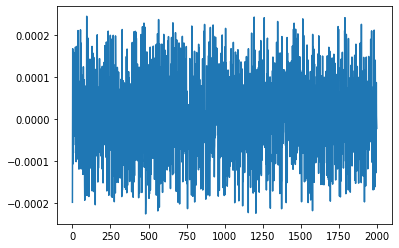

In [73]:
AdditionTraining.PlotThePredicted_DF()

# Let us try to see if we can learn subtraction behavior between A and B

In [74]:
SubtractionTraining = Training_Tensorflow(OutputVector='Subtraction')
SubtractionTraining.TrainTheModel()

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 2s 283us/sample - loss: 14.5417 - mean_squared_logarithmic_error: 0.2727
Epoch 2/25
8000/8000 [==============================] - 2s 253us/sample - loss: 0.0142 - mean_squared_logarithmic_error: 0.0010
Epoch 3/25
8000/8000 [==============================] - 2s 254us/sample - loss: 0.0064 - mean_squared_logarithmic_error: 4.8997e-04
Epoch 4/25
8000/8000 [==============================] - 2s 257us/sample - loss: 0.0032 - mean_squared_logarithmic_error: 2.5011e-04
Epoch 5/25
8000/8000 [==============================] - 2s 258us/sample - loss: 0.0017 - mean_squared_logarithmic_error: 1.3659e-04
Epoch 6/25
8000/8000 [==============================] - 2s 256us/sample - loss: 9.8327e-04 - mean_squared_logarithmic_error: 7.6831e-05
Epoch 7/25
8000/8000 [==============================] - 2s 257us/sample - loss: 5.6840e-04 - mean_squared_logarithmic_error: 4.4650e-05
Epoch 8/25
8000/8000 [==============================]

In [75]:
SubtractionTraining.PredictOneVal(A=30,B=25)

5.0

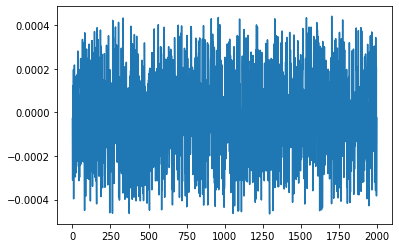

In [76]:
SubtractionTraining.PredictTheResult()
SubtractionTraining.PlotThePredicted_DF()

# Let us try to see if we can learn multiplication behavior between A and B

In [79]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel()

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 1s 110us/sample - loss: 1130.5499 - mean_squared_logarithmic_error: 4.2376
Epoch 2/25
8000/8000 [==============================] - 1s 78us/sample - loss: 1130.5256 - mean_squared_logarithmic_error: 4.2474
Epoch 3/25
8000/8000 [==============================] - 1s 78us/sample - loss: 1130.5074 - mean_squared_logarithmic_error: 4.2562
Epoch 4/25
8000/8000 [==============================] - 1s 78us/sample - loss: 1130.4908 - mean_squared_logarithmic_error: 4.2634
Epoch 5/25
8000/8000 [==============================] - 1s 78us/sample - loss: 1130.4703 - mean_squared_logarithmic_error: 4.2712
Epoch 6/25
8000/8000 [==============================] - 1s 78us/sample - loss: 1130.4507 - mean_squared_logarithmic_error: 4.2756
Epoch 7/25
8000/8000 [==============================] - 1s 80us/sample - loss: 1130.4375 - mean_squared_logarithmic_error: 4.2788
Epoch 8/25
8000/8000 [==============================] - 1s 77us/sam

In [81]:
MultiplicationTraining.PredictOneVal(A=11,B=9)

0.74

In [82]:
MultiplicationTraining.PredictOneVal(A=5,B=6)

0.42

## Looks like it did a very bad job for multiplication. Given the code we can play with three parameters: number of nodes in each Dense layer, optimizer function, activation function and loss function. Let us first change Dense layer number of nodes. Let us double it and see if it helps.

In [83]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(DenseNodeSize=2000)

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 3s 356us/sample - loss: 1129.6121 - mean_squared_logarithmic_error: 4.3340
Epoch 2/25
8000/8000 [==============================] - 2s 300us/sample - loss: 1129.5996 - mean_squared_logarithmic_error: 4.3372
Epoch 3/25
8000/8000 [==============================] - 3s 337us/sample - loss: 1129.5973 - mean_squared_logarithmic_error: 4.3401
Epoch 4/25
8000/8000 [==============================] - 2s 306us/sample - loss: 1129.5899 - mean_squared_logarithmic_error: 4.3428
Epoch 5/25
8000/8000 [==============================] - 2s 307us/sample - loss: 1129.5866 - mean_squared_logarithmic_error: 4.3459
Epoch 6/25
8000/8000 [==============================] - 2s 311us/sample - loss: 1129.5772 - mean_squared_logarithmic_error: 4.3480
Epoch 7/25
8000/8000 [==============================] - 2s 311us/sample - loss: 1129.5706 - mean_squared_logarithmic_error: 4.3515
Epoch 8/25
8000/8000 [==============================] - 2s 30

## Looks like it didn't help much in this particular case. Let us go to the optimizer and activation and use adam optimizer + selu activation now and put back the number of nodes in dense layer back to 1000. We will also increase the epochs to 250

In [88]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(optimizer='adam',activation='selu',epochs=250)

Train on 8000 samples
Epoch 1/250
8000/8000 [==============================] - 1s 140us/sample - loss: 1113.1812 - mean_squared_logarithmic_error: 4.0250
Epoch 2/250
8000/8000 [==============================] - 1s 94us/sample - loss: 1089.2133 - mean_squared_logarithmic_error: 3.7399
Epoch 3/250
8000/8000 [==============================] - 1s 93us/sample - loss: 1070.3270 - mean_squared_logarithmic_error: 3.7050
Epoch 4/250
8000/8000 [==============================] - 1s 94us/sample - loss: 1054.9777 - mean_squared_logarithmic_error: 3.6595
Epoch 5/250
8000/8000 [==============================] - 1s 94us/sample - loss: 1036.8264 - mean_squared_logarithmic_error: 3.2022
Epoch 6/250
8000/8000 [==============================] - 1s 95us/sample - loss: 1008.2480 - mean_squared_logarithmic_error: 2.4462
Epoch 7/250
8000/8000 [==============================] - 1s 99us/sample - loss: 964.5374 - mean_squared_logarithmic_error: 1.8755
Epoch 8/250
8000/8000 [==============================] - 1s 1

8000/8000 [==============================] - 1s 97us/sample - loss: 508.8087 - mean_squared_logarithmic_error: 0.1066
Epoch 64/250
8000/8000 [==============================] - 1s 93us/sample - loss: 508.7853 - mean_squared_logarithmic_error: 0.1053
Epoch 65/250
8000/8000 [==============================] - 1s 117us/sample - loss: 508.7759 - mean_squared_logarithmic_error: 0.1042
Epoch 66/250
8000/8000 [==============================] - 1s 95us/sample - loss: 508.7802 - mean_squared_logarithmic_error: 0.1051
Epoch 67/250
8000/8000 [==============================] - 1s 92us/sample - loss: 508.7544 - mean_squared_logarithmic_error: 0.1040
Epoch 68/250
8000/8000 [==============================] - 1s 102us/sample - loss: 508.7462 - mean_squared_logarithmic_error: 0.1046
Epoch 69/250
8000/8000 [==============================] - 1s 99us/sample - loss: 508.7349 - mean_squared_logarithmic_error: 0.1044
Epoch 70/250
8000/8000 [==============================] - 1s 95us/sample - loss: 508.7531 - me

8000/8000 [==============================] - 1s 95us/sample - loss: 508.0314 - mean_squared_logarithmic_error: 0.0703
Epoch 126/250
8000/8000 [==============================] - 1s 93us/sample - loss: 508.0047 - mean_squared_logarithmic_error: 0.0688
Epoch 127/250
8000/8000 [==============================] - 1s 93us/sample - loss: 507.9217 - mean_squared_logarithmic_error: 0.0662
Epoch 128/250
8000/8000 [==============================] - 1s 93us/sample - loss: 507.8855 - mean_squared_logarithmic_error: 0.0650
Epoch 129/250
8000/8000 [==============================] - 1s 93us/sample - loss: 507.8498 - mean_squared_logarithmic_error: 0.0642
Epoch 130/250
8000/8000 [==============================] - 1s 103us/sample - loss: 507.8093 - mean_squared_logarithmic_error: 0.0622
Epoch 131/250
8000/8000 [==============================] - 1s 123us/sample - loss: 507.7739 - mean_squared_logarithmic_error: 0.0617
Epoch 132/250
8000/8000 [==============================] - 1s 116us/sample - loss: 507.7

Epoch 187/250
8000/8000 [==============================] - 1s 93us/sample - loss: 506.5022 - mean_squared_logarithmic_error: 0.0434
Epoch 188/250
8000/8000 [==============================] - 1s 101us/sample - loss: 506.4965 - mean_squared_logarithmic_error: 0.0430
Epoch 189/250
8000/8000 [==============================] - 1s 99us/sample - loss: 506.4716 - mean_squared_logarithmic_error: 0.0419
Epoch 190/250
8000/8000 [==============================] - 1s 95us/sample - loss: 506.4577 - mean_squared_logarithmic_error: 0.0426
Epoch 191/250
8000/8000 [==============================] - 1s 96us/sample - loss: 506.4478 - mean_squared_logarithmic_error: 0.0412
Epoch 192/250
8000/8000 [==============================] - 1s 99us/sample - loss: 506.4217 - mean_squared_logarithmic_error: 0.0405
Epoch 193/250
8000/8000 [==============================] - 1s 98us/sample - loss: 506.4001 - mean_squared_logarithmic_error: 0.0402
Epoch 194/250
8000/8000 [==============================] - 1s 103us/sample 

8000/8000 [==============================] - 1s 101us/sample - loss: 505.7786 - mean_squared_logarithmic_error: 0.0133
Epoch 249/250
8000/8000 [==============================] - 1s 114us/sample - loss: 505.7497 - mean_squared_logarithmic_error: 0.0127
Epoch 250/250
8000/8000 [==============================] - 1s 141us/sample - loss: 505.7501 - mean_squared_logarithmic_error: 0.0128


In [89]:
MultiplicationTraining.PredictOneVal(A=11,B=9)

91.21

### Little better but still far off. Let us try to increase the epochs to 1000

In [91]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(optimizer='adam',activation='selu',epochs=1000)

Train on 8000 samples
Epoch 1/1000
8000/8000 [==============================] - 1s 167us/sample - loss: 1127.7993 - mean_squared_logarithmic_error: 3.9078
Epoch 2/1000
8000/8000 [==============================] - 1s 95us/sample - loss: 1096.4977 - mean_squared_logarithmic_error: 3.5306
Epoch 3/1000
8000/8000 [==============================] - 1s 93us/sample - loss: 1060.8051 - mean_squared_logarithmic_error: 3.5925
Epoch 4/1000
8000/8000 [==============================] - 1s 93us/sample - loss: 1040.5694 - mean_squared_logarithmic_error: 3.6050
Epoch 5/1000
8000/8000 [==============================] - 1s 99us/sample - loss: 1019.5138 - mean_squared_logarithmic_error: 3.4184
Epoch 6/1000
8000/8000 [==============================] - 1s 100us/sample - loss: 998.4669 - mean_squared_logarithmic_error: 3.1875
Epoch 7/1000
8000/8000 [==============================] - 1s 108us/sample - loss: 977.2303 - mean_squared_logarithmic_error: 2.8774
Epoch 8/1000
8000/8000 [=============================

8000/8000 [==============================] - 1s 121us/sample - loss: 733.6600 - mean_squared_logarithmic_error: 1.6390
Epoch 63/1000
8000/8000 [==============================] - 1s 92us/sample - loss: 733.6607 - mean_squared_logarithmic_error: 1.6386
Epoch 64/1000
8000/8000 [==============================] - 1s 117us/sample - loss: 733.6230 - mean_squared_logarithmic_error: 1.6378
Epoch 65/1000
8000/8000 [==============================] - 1s 101us/sample - loss: 733.6099 - mean_squared_logarithmic_error: 1.6371
Epoch 66/1000
8000/8000 [==============================] - 1s 94us/sample - loss: 733.6034 - mean_squared_logarithmic_error: 1.6363
Epoch 67/1000
8000/8000 [==============================] - 1s 96us/sample - loss: 733.6017 - mean_squared_logarithmic_error: 1.6362
Epoch 68/1000
8000/8000 [==============================] - 1s 103us/sample - loss: 733.6191 - mean_squared_logarithmic_error: 1.6361
Epoch 69/1000
8000/8000 [==============================] - 1s 106us/sample - loss: 733

8000/8000 [==============================] - 1s 112us/sample - loss: 658.1323 - mean_squared_logarithmic_error: 1.0791
Epoch 124/1000
8000/8000 [==============================] - 1s 95us/sample - loss: 658.1140 - mean_squared_logarithmic_error: 1.0775
Epoch 125/1000
8000/8000 [==============================] - 1s 99us/sample - loss: 658.0956 - mean_squared_logarithmic_error: 1.0773
Epoch 126/1000
8000/8000 [==============================] - 1s 138us/sample - loss: 658.0974 - mean_squared_logarithmic_error: 1.0766
Epoch 127/1000
8000/8000 [==============================] - 1s 149us/sample - loss: 658.0694 - mean_squared_logarithmic_error: 1.0752
Epoch 128/1000
8000/8000 [==============================] - 1s 113us/sample - loss: 658.0453 - mean_squared_logarithmic_error: 1.0750
Epoch 129/1000
8000/8000 [==============================] - 1s 98us/sample - loss: 658.0330 - mean_squared_logarithmic_error: 1.0746
Epoch 130/1000
8000/8000 [==============================] - 1s 99us/sample - los

8000/8000 [==============================] - 1s 96us/sample - loss: 522.0104 - mean_squared_logarithmic_error: 0.0530
Epoch 185/1000
8000/8000 [==============================] - 1s 94us/sample - loss: 521.9639 - mean_squared_logarithmic_error: 0.0529
Epoch 186/1000
8000/8000 [==============================] - 1s 93us/sample - loss: 521.9653 - mean_squared_logarithmic_error: 0.0527
Epoch 187/1000
8000/8000 [==============================] - 1s 97us/sample - loss: 521.9419 - mean_squared_logarithmic_error: 0.0523
Epoch 188/1000
8000/8000 [==============================] - 1s 100us/sample - loss: 521.9356 - mean_squared_logarithmic_error: 0.0518
Epoch 189/1000
8000/8000 [==============================] - 1s 112us/sample - loss: 521.9075 - mean_squared_logarithmic_error: 0.0514
Epoch 190/1000
8000/8000 [==============================] - 1s 104us/sample - loss: 521.8852 - mean_squared_logarithmic_error: 0.0517
Epoch 191/1000
8000/8000 [==============================] - 1s 94us/sample - loss

8000/8000 [==============================] - 1s 109us/sample - loss: 521.2302 - mean_squared_logarithmic_error: 0.0242
Epoch 246/1000
8000/8000 [==============================] - 1s 100us/sample - loss: 521.2457 - mean_squared_logarithmic_error: 0.0243
Epoch 247/1000
8000/8000 [==============================] - 1s 104us/sample - loss: 521.1913 - mean_squared_logarithmic_error: 0.0231
Epoch 248/1000
8000/8000 [==============================] - 1s 103us/sample - loss: 521.1885 - mean_squared_logarithmic_error: 0.0227
Epoch 249/1000
8000/8000 [==============================] - 1s 100us/sample - loss: 521.1707 - mean_squared_logarithmic_error: 0.0223
Epoch 250/1000
8000/8000 [==============================] - 1s 111us/sample - loss: 521.1733 - mean_squared_logarithmic_error: 0.0218
Epoch 251/1000
8000/8000 [==============================] - 1s 104us/sample - loss: 521.1648 - mean_squared_logarithmic_error: 0.0212
Epoch 252/1000
8000/8000 [==============================] - 1s 108us/sample -

8000/8000 [==============================] - 1s 105us/sample - loss: 520.8158 - mean_squared_logarithmic_error: 0.0049
Epoch 307/1000
8000/8000 [==============================] - 1s 95us/sample - loss: 520.8090 - mean_squared_logarithmic_error: 0.0049
Epoch 308/1000
8000/8000 [==============================] - 1s 94us/sample - loss: 520.7946 - mean_squared_logarithmic_error: 0.0046
Epoch 309/1000
8000/8000 [==============================] - 1s 97us/sample - loss: 520.7999 - mean_squared_logarithmic_error: 0.0045
Epoch 310/1000
8000/8000 [==============================] - 1s 106us/sample - loss: 520.7891 - mean_squared_logarithmic_error: 0.0045
Epoch 311/1000
8000/8000 [==============================] - 1s 105us/sample - loss: 520.7954 - mean_squared_logarithmic_error: 0.0046
Epoch 312/1000
8000/8000 [==============================] - 1s 98us/sample - loss: 520.7886 - mean_squared_logarithmic_error: 0.0044
Epoch 313/1000
8000/8000 [==============================] - 1s 94us/sample - loss

8000/8000 [==============================] - 1s 106us/sample - loss: 520.6831 - mean_squared_logarithmic_error: 0.0023
Epoch 368/1000
8000/8000 [==============================] - 1s 111us/sample - loss: 520.6826 - mean_squared_logarithmic_error: 0.0022
Epoch 369/1000
8000/8000 [==============================] - 1s 105us/sample - loss: 520.6830 - mean_squared_logarithmic_error: 0.0023
Epoch 370/1000
8000/8000 [==============================] - 1s 92us/sample - loss: 520.6813 - mean_squared_logarithmic_error: 0.0022
Epoch 371/1000
8000/8000 [==============================] - 1s 100us/sample - loss: 520.6730 - mean_squared_logarithmic_error: 0.0022
Epoch 372/1000
8000/8000 [==============================] - 1s 98us/sample - loss: 520.6872 - mean_squared_logarithmic_error: 0.0022
Epoch 373/1000
8000/8000 [==============================] - 1s 96us/sample - loss: 520.6769 - mean_squared_logarithmic_error: 0.0022
Epoch 374/1000
8000/8000 [==============================] - 1s 91us/sample - los

8000/8000 [==============================] - 1s 102us/sample - loss: 520.6277 - mean_squared_logarithmic_error: 0.0013
Epoch 429/1000
8000/8000 [==============================] - 1s 97us/sample - loss: 520.6351 - mean_squared_logarithmic_error: 0.0014
Epoch 430/1000
8000/8000 [==============================] - 1s 95us/sample - loss: 520.6420 - mean_squared_logarithmic_error: 0.0016
Epoch 431/1000
8000/8000 [==============================] - 1s 98us/sample - loss: 520.6319 - mean_squared_logarithmic_error: 0.0013
Epoch 432/1000
8000/8000 [==============================] - 1s 103us/sample - loss: 520.6313 - mean_squared_logarithmic_error: 0.0013
Epoch 433/1000
8000/8000 [==============================] - 1s 117us/sample - loss: 520.6379 - mean_squared_logarithmic_error: 0.0014
Epoch 434/1000
8000/8000 [==============================] - 1s 102us/sample - loss: 520.6337 - mean_squared_logarithmic_error: 0.0013
Epoch 435/1000
8000/8000 [==============================] - 1s 113us/sample - lo

8000/8000 [==============================] - 1s 97us/sample - loss: 520.6104 - mean_squared_logarithmic_error: 0.0011
Epoch 490/1000
8000/8000 [==============================] - 1s 94us/sample - loss: 520.6162 - mean_squared_logarithmic_error: 0.0011
Epoch 491/1000
8000/8000 [==============================] - 1s 90us/sample - loss: 520.6104 - mean_squared_logarithmic_error: 0.0011
Epoch 492/1000
8000/8000 [==============================] - 1s 95us/sample - loss: 520.6029 - mean_squared_logarithmic_error: 9.6839e-04
Epoch 493/1000
8000/8000 [==============================] - 1s 92us/sample - loss: 520.6090 - mean_squared_logarithmic_error: 9.8048e-04
Epoch 494/1000
8000/8000 [==============================] - 1s 95us/sample - loss: 520.6205 - mean_squared_logarithmic_error: 0.0012
Epoch 495/1000
8000/8000 [==============================] - 1s 94us/sample - loss: 520.6081 - mean_squared_logarithmic_error: 9.9687e-04
Epoch 496/1000
8000/8000 [==============================] - 1s 93us/samp

8000/8000 [==============================] - 1s 95us/sample - loss: 520.5909 - mean_squared_logarithmic_error: 7.6696e-04
Epoch 550/1000
8000/8000 [==============================] - 1s 95us/sample - loss: 520.5956 - mean_squared_logarithmic_error: 7.6690e-04
Epoch 551/1000
8000/8000 [==============================] - 1s 97us/sample - loss: 520.5966 - mean_squared_logarithmic_error: 8.2748e-04
Epoch 552/1000
8000/8000 [==============================] - 1s 98us/sample - loss: 520.5957 - mean_squared_logarithmic_error: 7.9926e-04
Epoch 553/1000
8000/8000 [==============================] - 1s 102us/sample - loss: 520.5950 - mean_squared_logarithmic_error: 7.5063e-04
Epoch 554/1000
8000/8000 [==============================] - 1s 94us/sample - loss: 520.5915 - mean_squared_logarithmic_error: 7.2566e-04
Epoch 555/1000
8000/8000 [==============================] - 1s 102us/sample - loss: 520.5932 - mean_squared_logarithmic_error: 7.2727e-04
Epoch 556/1000
8000/8000 [============================

8000/8000 [==============================] - 1s 98us/sample - loss: 520.5984 - mean_squared_logarithmic_error: 6.9919e-04
Epoch 609/1000
8000/8000 [==============================] - 1s 95us/sample - loss: 520.5972 - mean_squared_logarithmic_error: 7.0192e-04
Epoch 610/1000
8000/8000 [==============================] - 1s 94us/sample - loss: 520.5880 - mean_squared_logarithmic_error: 6.0138e-04
Epoch 611/1000
8000/8000 [==============================] - 1s 94us/sample - loss: 520.5933 - mean_squared_logarithmic_error: 7.3850e-04
Epoch 612/1000
8000/8000 [==============================] - 1s 93us/sample - loss: 520.5958 - mean_squared_logarithmic_error: 7.2452e-04
Epoch 613/1000
8000/8000 [==============================] - 1s 107us/sample - loss: 520.5836 - mean_squared_logarithmic_error: 5.8086e-04
Epoch 614/1000
8000/8000 [==============================] - 1s 109us/sample - loss: 520.5895 - mean_squared_logarithmic_error: 6.8021e-04
Epoch 615/1000
8000/8000 [============================

8000/8000 [==============================] - 1s 109us/sample - loss: 520.5824 - mean_squared_logarithmic_error: 4.9401e-04
Epoch 668/1000
8000/8000 [==============================] - 1s 110us/sample - loss: 520.5798 - mean_squared_logarithmic_error: 4.9132e-04
Epoch 669/1000
8000/8000 [==============================] - 1s 122us/sample - loss: 520.5802 - mean_squared_logarithmic_error: 4.8457e-04
Epoch 670/1000
8000/8000 [==============================] - 1s 101us/sample - loss: 520.5812 - mean_squared_logarithmic_error: 4.7611e-04
Epoch 671/1000
8000/8000 [==============================] - 1s 121us/sample - loss: 520.5834 - mean_squared_logarithmic_error: 4.9429e-04
Epoch 672/1000
8000/8000 [==============================] - 1s 123us/sample - loss: 520.5795 - mean_squared_logarithmic_error: 4.6097e-04
Epoch 673/1000
8000/8000 [==============================] - 1s 125us/sample - loss: 520.5786 - mean_squared_logarithmic_error: 4.2985e-04
Epoch 674/1000
8000/8000 [=======================

8000/8000 [==============================] - 1s 93us/sample - loss: 520.5801 - mean_squared_logarithmic_error: 4.1770e-04
Epoch 727/1000
8000/8000 [==============================] - 1s 97us/sample - loss: 520.5801 - mean_squared_logarithmic_error: 3.8733e-04
Epoch 728/1000
8000/8000 [==============================] - 1s 94us/sample - loss: 520.5795 - mean_squared_logarithmic_error: 4.2646e-04
Epoch 729/1000
8000/8000 [==============================] - 1s 96us/sample - loss: 520.5814 - mean_squared_logarithmic_error: 4.2093e-04
Epoch 730/1000
8000/8000 [==============================] - 1s 95us/sample - loss: 520.5791 - mean_squared_logarithmic_error: 4.1285e-04
Epoch 731/1000
8000/8000 [==============================] - 1s 95us/sample - loss: 520.5782 - mean_squared_logarithmic_error: 3.7696e-04
Epoch 732/1000
8000/8000 [==============================] - 1s 108us/sample - loss: 520.5846 - mean_squared_logarithmic_error: 4.6284e-04
Epoch 733/1000
8000/8000 [=============================

8000/8000 [==============================] - 1s 99us/sample - loss: 520.5767 - mean_squared_logarithmic_error: 3.3294e-04
Epoch 786/1000
8000/8000 [==============================] - 1s 115us/sample - loss: 520.5762 - mean_squared_logarithmic_error: 3.4961e-04
Epoch 787/1000
8000/8000 [==============================] - 1s 106us/sample - loss: 520.5731 - mean_squared_logarithmic_error: 3.0560e-04
Epoch 788/1000
8000/8000 [==============================] - 1s 95us/sample - loss: 520.5734 - mean_squared_logarithmic_error: 3.2811e-04
Epoch 789/1000
8000/8000 [==============================] - 1s 92us/sample - loss: 520.5726 - mean_squared_logarithmic_error: 2.8858e-04
Epoch 790/1000
8000/8000 [==============================] - 1s 90us/sample - loss: 520.5768 - mean_squared_logarithmic_error: 3.4952e-04
Epoch 791/1000
8000/8000 [==============================] - 1s 93us/sample - loss: 520.5778 - mean_squared_logarithmic_error: 3.2374e-04
Epoch 792/1000
8000/8000 [============================

8000/8000 [==============================] - 1s 110us/sample - loss: 520.5717 - mean_squared_logarithmic_error: 2.4668e-04
Epoch 845/1000
8000/8000 [==============================] - 1s 98us/sample - loss: 520.5722 - mean_squared_logarithmic_error: 2.5596e-04
Epoch 846/1000
8000/8000 [==============================] - 1s 99us/sample - loss: 520.5718 - mean_squared_logarithmic_error: 2.5575e-04
Epoch 847/1000
8000/8000 [==============================] - 1s 97us/sample - loss: 520.5738 - mean_squared_logarithmic_error: 2.7394e-04
Epoch 848/1000
8000/8000 [==============================] - 1s 100us/sample - loss: 520.5817 - mean_squared_logarithmic_error: 3.2418e-04
Epoch 849/1000
8000/8000 [==============================] - 1s 99us/sample - loss: 520.5787 - mean_squared_logarithmic_error: 2.9879e-04
Epoch 850/1000
8000/8000 [==============================] - 1s 102us/sample - loss: 520.5714 - mean_squared_logarithmic_error: 2.5345e-04
Epoch 851/1000
8000/8000 [===========================

8000/8000 [==============================] - 1s 97us/sample - loss: 520.5708 - mean_squared_logarithmic_error: 2.1319e-04
Epoch 904/1000
8000/8000 [==============================] - 1s 94us/sample - loss: 520.5701 - mean_squared_logarithmic_error: 2.1734e-04
Epoch 905/1000
8000/8000 [==============================] - 1s 93us/sample - loss: 520.5702 - mean_squared_logarithmic_error: 2.0386e-04
Epoch 906/1000
8000/8000 [==============================] - 1s 92us/sample - loss: 520.5737 - mean_squared_logarithmic_error: 2.3568e-04
Epoch 907/1000
8000/8000 [==============================] - 1s 94us/sample - loss: 520.5753 - mean_squared_logarithmic_error: 2.6614e-04
Epoch 908/1000
8000/8000 [==============================] - 1s 90us/sample - loss: 520.5763 - mean_squared_logarithmic_error: 2.8633e-04
Epoch 909/1000
8000/8000 [==============================] - 1s 94us/sample - loss: 520.5772 - mean_squared_logarithmic_error: 3.0843e-04
Epoch 910/1000
8000/8000 [==============================

8000/8000 [==============================] - 1s 103us/sample - loss: 520.5710 - mean_squared_logarithmic_error: 2.0495e-04
Epoch 963/1000
8000/8000 [==============================] - 1s 97us/sample - loss: 520.5708 - mean_squared_logarithmic_error: 2.2322e-04
Epoch 964/1000
8000/8000 [==============================] - 1s 103us/sample - loss: 520.5699 - mean_squared_logarithmic_error: 2.0002e-04
Epoch 965/1000
8000/8000 [==============================] - 1s 94us/sample - loss: 520.5732 - mean_squared_logarithmic_error: 2.0965e-04
Epoch 966/1000
8000/8000 [==============================] - 1s 94us/sample - loss: 520.5704 - mean_squared_logarithmic_error: 1.8853e-04
Epoch 967/1000
8000/8000 [==============================] - 1s 92us/sample - loss: 520.5711 - mean_squared_logarithmic_error: 2.0573e-04
Epoch 968/1000
8000/8000 [==============================] - 1s 92us/sample - loss: 520.5776 - mean_squared_logarithmic_error: 2.5039e-04
Epoch 969/1000
8000/8000 [============================

In [96]:
MultiplicationTraining.PredictOneVal(A=11,B=9)

97.77

### As you can see it is relatively difficult. Why don't you play with it and find out a good solution?

### Let us move to Sin and Cos

In [101]:
SinTraining = Training_Tensorflow(OutputVector='Sin(Addition)')
SinTraining.TrainTheModel(epochs=100)

Train on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 141us/sample - loss: 0.6173 - mean_squared_logarithmic_error: 0.1179
Epoch 2/100
8000/8000 [==============================] - 1s 97us/sample - loss: 0.6075 - mean_squared_logarithmic_error: 0.1172
Epoch 3/100
8000/8000 [==============================] - 1s 77us/sample - loss: 0.5987 - mean_squared_logarithmic_error: 0.1166
Epoch 4/100
8000/8000 [==============================] - 1s 78us/sample - loss: 0.5907 - mean_squared_logarithmic_error: 0.1161
Epoch 5/100
8000/8000 [==============================] - 1s 77us/sample - loss: 0.5836 - mean_squared_logarithmic_error: 0.1157
Epoch 6/100
8000/8000 [==============================] - 1s 77us/sample - loss: 0.5771 - mean_squared_logarithmic_error: 0.1154
Epoch 7/100
8000/8000 [==============================] - 1s 77us/sample - loss: 0.5712 - mean_squared_logarithmic_error: 0.1151
Epoch 8/100
8000/8000 [==============================] - 1s 78us/sample - loss: 0

8000/8000 [==============================] - 1s 105us/sample - loss: 0.4986 - mean_squared_logarithmic_error: 0.1218
Epoch 65/100
8000/8000 [==============================] - 1s 103us/sample - loss: 0.4985 - mean_squared_logarithmic_error: 0.1219
Epoch 66/100
8000/8000 [==============================] - 1s 87us/sample - loss: 0.4983 - mean_squared_logarithmic_error: 0.1220
Epoch 67/100
8000/8000 [==============================] - 1s 86us/sample - loss: 0.4982 - mean_squared_logarithmic_error: 0.1222
Epoch 68/100
8000/8000 [==============================] - 1s 95us/sample - loss: 0.4980 - mean_squared_logarithmic_error: 0.1223
Epoch 69/100
8000/8000 [==============================] - 1s 85us/sample - loss: 0.4979 - mean_squared_logarithmic_error: 0.1224
Epoch 70/100
8000/8000 [==============================] - 1s 83us/sample - loss: 0.4978 - mean_squared_logarithmic_error: 0.1225
Epoch 71/100
8000/8000 [==============================] - 1s 80us/sample - loss: 0.4977 - mean_squared_logar

In [103]:
CosTraining = Training_Tensorflow(OutputVector='Cos(Addition)')
CosTraining.TrainTheModel(epochs=100)

Train on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 110us/sample - loss: 0.6360 - mean_squared_logarithmic_error: 0.1208
Epoch 2/100
8000/8000 [==============================] - 1s 79us/sample - loss: 0.6255 - mean_squared_logarithmic_error: 0.1201
Epoch 3/100
8000/8000 [==============================] - 1s 77us/sample - loss: 0.6160 - mean_squared_logarithmic_error: 0.1194
Epoch 4/100
8000/8000 [==============================] - 1s 77us/sample - loss: 0.6075 - mean_squared_logarithmic_error: 0.1189
Epoch 5/100
8000/8000 [==============================] - 1s 77us/sample - loss: 0.5998 - mean_squared_logarithmic_error: 0.1185
Epoch 6/100
8000/8000 [==============================] - 1s 77us/sample - loss: 0.5928 - mean_squared_logarithmic_error: 0.1181
Epoch 7/100
8000/8000 [==============================] - 1s 77us/sample - loss: 0.5865 - mean_squared_logarithmic_error: 0.1178
Epoch 8/100
8000/8000 [==============================] - 1s 78us/sample - loss: 0

8000/8000 [==============================] - 1s 82us/sample - loss: 0.5101 - mean_squared_logarithmic_error: 0.1250
Epoch 65/100
8000/8000 [==============================] - 1s 83us/sample - loss: 0.5099 - mean_squared_logarithmic_error: 0.1252
Epoch 66/100
8000/8000 [==============================] - 1s 79us/sample - loss: 0.5098 - mean_squared_logarithmic_error: 0.1253
Epoch 67/100
8000/8000 [==============================] - 1s 80us/sample - loss: 0.5096 - mean_squared_logarithmic_error: 0.1254
Epoch 68/100
8000/8000 [==============================] - 1s 83us/sample - loss: 0.5095 - mean_squared_logarithmic_error: 0.1256
Epoch 69/100
8000/8000 [==============================] - 1s 77us/sample - loss: 0.5093 - mean_squared_logarithmic_error: 0.1257
Epoch 70/100
8000/8000 [==============================] - 1s 79us/sample - loss: 0.5092 - mean_squared_logarithmic_error: 0.1258
Epoch 71/100
8000/8000 [==============================] - 1s 83us/sample - loss: 0.5091 - mean_squared_logarit

In [104]:
SinTraining.PredictOneVal(A=0.5,B=0.5)

-0.0

In [106]:
CosTraining.PredictOneVal(A=0.0,B=0.0)

0.0

### Looks like it is not working for Sin and Cos well either. Now we will see 2^Addition and log(Addition)

In [107]:
TwoPowerTraining = Training_Tensorflow(OutputVector='2^Addition')
TwoPowerTraining.TrainTheModel(optimizer='adam',activation='selu',epochs=250)

Train on 8000 samples
Epoch 1/250
8000/8000 [==============================] - 1s 141us/sample - loss: 1383854080.0000 - mean_squared_logarithmic_error: 11.2606
Epoch 2/250
8000/8000 [==============================] - 1s 94us/sample - loss: 1383667156.0000 - mean_squared_logarithmic_error: 6.6814
Epoch 3/250
8000/8000 [==============================] - 1s 92us/sample - loss: 1383343174.0000 - mean_squared_logarithmic_error: 4.8074
Epoch 4/250
8000/8000 [==============================] - 1s 93us/sample - loss: 1382873464.0000 - mean_squared_logarithmic_error: 3.9258
Epoch 5/250
8000/8000 [==============================] - 1s 98us/sample - loss: 1382282115.0000 - mean_squared_logarithmic_error: 3.5458
Epoch 6/250
8000/8000 [==============================] - 1s 96us/sample - loss: 1381541672.0000 - mean_squared_logarithmic_error: 3.4339
Epoch 7/250
8000/8000 [==============================] - 1s 93us/sample - loss: 1380729412.0000 - mean_squared_logarithmic_error: 3.4614
Epoch 8/250
8000/

8000/8000 [==============================] - 1s 92us/sample - loss: 1225127406.0000 - mean_squared_logarithmic_error: 7.8259
Epoch 61/250
8000/8000 [==============================] - 1s 97us/sample - loss: 1221557048.0000 - mean_squared_logarithmic_error: 7.8115
Epoch 62/250
8000/8000 [==============================] - 1s 97us/sample - loss: 1217998138.0000 - mean_squared_logarithmic_error: 7.7881
Epoch 63/250
8000/8000 [==============================] - 1s 92us/sample - loss: 1214556209.0000 - mean_squared_logarithmic_error: 7.7647
Epoch 64/250
8000/8000 [==============================] - 1s 92us/sample - loss: 1211273072.0000 - mean_squared_logarithmic_error: 7.7510
Epoch 65/250
8000/8000 [==============================] - 1s 91us/sample - loss: 1207681530.0000 - mean_squared_logarithmic_error: 7.7230
Epoch 66/250
8000/8000 [==============================] - 1s 93us/sample - loss: 1204256208.0000 - mean_squared_logarithmic_error: 7.6929
Epoch 67/250
8000/8000 [=======================

8000/8000 [==============================] - 1s 99us/sample - loss: 1076760098.0000 - mean_squared_logarithmic_error: 6.1353
Epoch 120/250
8000/8000 [==============================] - 1s 94us/sample - loss: 1075110709.0000 - mean_squared_logarithmic_error: 6.1027
Epoch 121/250
8000/8000 [==============================] - 1s 92us/sample - loss: 1073483807.0000 - mean_squared_logarithmic_error: 6.0769
Epoch 122/250
8000/8000 [==============================] - 1s 94us/sample - loss: 1071973086.0000 - mean_squared_logarithmic_error: 6.0475
Epoch 123/250
8000/8000 [==============================] - 1s 96us/sample - loss: 1070416367.0000 - mean_squared_logarithmic_error: 6.0241
Epoch 124/250
8000/8000 [==============================] - 1s 98us/sample - loss: 1068894021.0000 - mean_squared_logarithmic_error: 5.9881
Epoch 125/250
8000/8000 [==============================] - 1s 105us/sample - loss: 1067435744.0000 - mean_squared_logarithmic_error: 5.9541
Epoch 126/250
8000/8000 [===============

8000/8000 [==============================] - 1s 96us/sample - loss: 1006693934.0000 - mean_squared_logarithmic_error: 4.9817
Epoch 178/250
8000/8000 [==============================] - 1s 98us/sample - loss: 1005730682.0000 - mean_squared_logarithmic_error: 4.9716
Epoch 179/250
8000/8000 [==============================] - 1s 97us/sample - loss: 1004817676.0000 - mean_squared_logarithmic_error: 4.9701
Epoch 180/250
8000/8000 [==============================] - 1s 99us/sample - loss: 1003854032.0000 - mean_squared_logarithmic_error: 4.9657
Epoch 181/250
8000/8000 [==============================] - 1s 101us/sample - loss: 1002958290.0000 - mean_squared_logarithmic_error: 4.9727
Epoch 182/250
8000/8000 [==============================] - 1s 97us/sample - loss: 1002057549.0000 - mean_squared_logarithmic_error: 4.9594
Epoch 183/250
8000/8000 [==============================] - 1s 99us/sample - loss: 1001172061.5000 - mean_squared_logarithmic_error: 4.9537
Epoch 184/250
8000/8000 [===============

8000/8000 [==============================] - 1s 126us/sample - loss: 958420554.0000 - mean_squared_logarithmic_error: 4.7159
Epoch 237/250
8000/8000 [==============================] - 1s 114us/sample - loss: 957755046.0000 - mean_squared_logarithmic_error: 4.7181
Epoch 238/250
8000/8000 [==============================] - 1s 101us/sample - loss: 956911396.0000 - mean_squared_logarithmic_error: 4.7177
Epoch 239/250
8000/8000 [==============================] - 1s 109us/sample - loss: 956201760.0000 - mean_squared_logarithmic_error: 4.7154
Epoch 240/250
8000/8000 [==============================] - 1s 103us/sample - loss: 955487913.0000 - mean_squared_logarithmic_error: 4.7161
Epoch 241/250
8000/8000 [==============================] - 1s 93us/sample - loss: 954832837.0000 - mean_squared_logarithmic_error: 4.7098
Epoch 242/250
8000/8000 [==============================] - 1s 91us/sample - loss: 954095081.0000 - mean_squared_logarithmic_error: 4.7097
Epoch 243/250
8000/8000 [==================

In [109]:
TwoPowerTraining.PredictOneVal(A=2,B=2)

7082.28

### Looks like it is not working much for this one either. Time for you to roll up tricks from your sleeves

## Now let us do classification on the final column and call it bye for this csv file. 
### To do that first we have to replace odd and even with 0 and 1 in the DF and thus we modify the class slightly.

In [116]:
class Training_Tensorflow_Classification:
    
    def __init__(self, 
                 A = Master_DF.A, 
                 B = Master_DF.B, 
                 OutputVector=None, 
                 ClassificationOrRegression="Regression"):
        
        self.Master_DF_Classification = Master_DF.copy()
        self.Master_DF_Classification.replace("Odd",0,inplace=True)
        self.Master_DF_Classification.replace("Even",1,inplace=True)
        self.A = A
        self.B = B
        self.OutputVector = OutputVector
        self.TypeOfTraining = ClassificationOrRegression
        self.Training_DF = None
        self.Test_DF = None
        self.Model = None
        self.Predicted_DF = None
        self.TrainTestSplit()
        
    def TrainTestSplit(self, TestFractionSize=0.2):
        self.Training_DF, self.Test_DF = train_test_split(self.Master_DF_Classification, test_size=TestFractionSize)
        
    def TrainTheModel(self, DenseNodeSize = 1000, batch_size=500, epochs=25, activation='linear',optimizer='sgd', loss='mean_squared_error'):
        self.Model = tf.keras.Sequential()
        self.Model.add(keras.layers.Dense(DenseNodeSize, activation='selu'))
        self.Model.add(keras.layers.Dense(DenseNodeSize, activation=activation))
        self.Model.compile(optimizer=optimizer,loss=loss,metrics=[tf.keras.metrics.BinaryCrossentropy()])
        xs = np.array([(a,b) for a,b in zip(self.Training_DF.A,self.Training_DF.B)])
        ys = np.array(self.Training_DF[self.OutputVector], dtype='float')
        self.Model.fit(xs,ys,batch_size=batch_size,epochs=epochs)
        
    def PredictTheResult(self):
        self.Predicted_DF = pd.DataFrame(columns=['InputVals','PredictedVals','Difference'],dtype='float')
        self.Predicted_DF.InputVals = self.Test_DF[self.OutputVector]
        xs = np.array([(a,b) for a,b in zip(self.Test_DF.A,self.Test_DF.B)])
        self.Predicted_DF.PredictedVals = self.Model.predict(xs)[:len(self.Test_DF)]
        self.Predicted_DF.Difference = self.Predicted_DF.InputVals - self.Predicted_DF.PredictedVals
        
    def PredictOneVal(self, A=None, B=None):
        return np.round(self.Model.predict(np.array([[A,B]]))[0][0],2)
    
    def PlotThePredicted_DF(self):
        plt.figure()
        plt.plot(range(len(self.Test_DF)),self.Predicted_DF.Difference)
        plt.show()

In [120]:
OddEvenTraining = Training_Tensorflow_Classification(OutputVector='ODD_OR_EVEN(CEIL(A+B))')
OddEvenTraining.TrainTheModel(activation='softmax',optimizer='adam',epochs=250)

Train on 8000 samples
Epoch 1/250
8000/8000 [==============================] - 1s 141us/sample - loss: 0.4901 - binary_crossentropy: 3.4405
Epoch 2/250
8000/8000 [==============================] - 1s 94us/sample - loss: 0.4901 - binary_crossentropy: 3.4396
Epoch 3/250
8000/8000 [==============================] - 1s 96us/sample - loss: 0.4901 - binary_crossentropy: 3.4385
Epoch 4/250
8000/8000 [==============================] - 1s 98us/sample - loss: 0.4901 - binary_crossentropy: 3.4371
Epoch 5/250
8000/8000 [==============================] - 1s 93us/sample - loss: 0.4901 - binary_crossentropy: 3.4357
Epoch 6/250
8000/8000 [==============================] - 1s 94us/sample - loss: 0.4901 - binary_crossentropy: 3.4342
Epoch 7/250
8000/8000 [==============================] - 1s 94us/sample - loss: 0.4901 - binary_crossentropy: 3.4327
Epoch 8/250
8000/8000 [==============================] - 1s 97us/sample - loss: 0.4901 - binary_crossentropy: 3.4311
Epoch 9/250
8000/8000 [==================

Epoch 70/250
8000/8000 [==============================] - 1s 116us/sample - loss: 0.4901 - binary_crossentropy: 3.3955
Epoch 71/250
8000/8000 [==============================] - 1s 107us/sample - loss: 0.4901 - binary_crossentropy: 3.3954
Epoch 72/250
8000/8000 [==============================] - 1s 97us/sample - loss: 0.4901 - binary_crossentropy: 3.3953
Epoch 73/250
8000/8000 [==============================] - 1s 96us/sample - loss: 0.4901 - binary_crossentropy: 3.3952
Epoch 74/250
8000/8000 [==============================] - 1s 93us/sample - loss: 0.4901 - binary_crossentropy: 3.3952
Epoch 75/250
8000/8000 [==============================] - 1s 96us/sample - loss: 0.4901 - binary_crossentropy: 3.3951
Epoch 76/250
8000/8000 [==============================] - 1s 96us/sample - loss: 0.4901 - binary_crossentropy: 3.3950
Epoch 77/250
8000/8000 [==============================] - 1s 97us/sample - loss: 0.4901 - binary_crossentropy: 3.3950
Epoch 78/250
8000/8000 [==============================

8000/8000 [==============================] - 1s 98us/sample - loss: 0.4901 - binary_crossentropy: 3.3937
Epoch 139/250
8000/8000 [==============================] - 1s 95us/sample - loss: 0.4901 - binary_crossentropy: 3.3937
Epoch 140/250
8000/8000 [==============================] - 1s 96us/sample - loss: 0.4901 - binary_crossentropy: 3.3937
Epoch 141/250
8000/8000 [==============================] - 1s 95us/sample - loss: 0.4901 - binary_crossentropy: 3.3937
Epoch 142/250
8000/8000 [==============================] - 1s 95us/sample - loss: 0.4901 - binary_crossentropy: 3.3937
Epoch 143/250
8000/8000 [==============================] - 1s 98us/sample - loss: 0.4901 - binary_crossentropy: 3.3937
Epoch 144/250
8000/8000 [==============================] - 1s 96us/sample - loss: 0.4901 - binary_crossentropy: 3.3937
Epoch 145/250
8000/8000 [==============================] - 1s 94us/sample - loss: 0.4901 - binary_crossentropy: 3.3937
Epoch 146/250
8000/8000 [==============================] - 1s 

8000/8000 [==============================] - 1s 100us/sample - loss: 0.4901 - binary_crossentropy: 3.3935
Epoch 207/250
8000/8000 [==============================] - 1s 98us/sample - loss: 0.4901 - binary_crossentropy: 3.3935
Epoch 208/250
8000/8000 [==============================] - 1s 116us/sample - loss: 0.4901 - binary_crossentropy: 3.3935
Epoch 209/250
8000/8000 [==============================] - 1s 105us/sample - loss: 0.4901 - binary_crossentropy: 3.3935
Epoch 210/250
8000/8000 [==============================] - 1s 98us/sample - loss: 0.4901 - binary_crossentropy: 3.3935
Epoch 211/250
8000/8000 [==============================] - 1s 112us/sample - loss: 0.4901 - binary_crossentropy: 3.3935
Epoch 212/250
8000/8000 [==============================] - 1s 110us/sample - loss: 0.4901 - binary_crossentropy: 3.3935
Epoch 213/250
8000/8000 [==============================] - 1s 104us/sample - loss: 0.4901 - binary_crossentropy: 3.3935
Epoch 214/250
8000/8000 [==============================]

In [121]:
OddEvenTraining.PredictOneVal(A=5,B=5)

0.0

In [122]:
OddEvenTraining.PredictOneVal(A=5,B=6)

0.0